In [21]:
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
import time
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
from time import sleep
import requests
import os
import tqdm
import warnings
from selenium.webdriver.chrome.options import Options
import re
chrome_options = Options()
chrome_options.add_argument("--log-level=3")

# Q. 1

In [45]:
import warnings
warnings.filterwarnings("ignore")

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.amazon.in/')


def search_func(input_data):
    search_input = driver.find_element_by_id("twotabsearchtextbox")
    search_button = driver.find_element_by_id("nav-search-submit-button")
    search_input.send_keys(input_data)
    search_button.click()
    
    
input_data = input('Enter Item to be Searched:')
search_func(input_data)

[WDM] - Current google-chrome version is 93.0.4577
[WDM] - Get LATEST driver version for 93.0.4577


[WDM] - Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache


Enter Item to be Searched:guitar


# Q. 2

In [71]:
urls = []
product_urls = []




driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.amazon.in/')

input_data = 'guitar'
search_func(input_data)

sleep(3)

page_url = driver.find_elements_by_xpath("//li[@class= 'a-normal']/a")

sleep(2)

for i in page_url:
    urls.append(i.get_attribute('href'))
    

    
for i in urls:
    driver.get(i)
    product_url = driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
    for i in product_url:
        product_urls.append(i.get_attribute('href'))    
    
    
Brand_name=[]
Name_of_product=[]
Rating=[]
No_of_ratings=[]
Price=[]
Return_exchange=[]
Expected_delivery=[]
Availibility=[]
Other_details=[]




for i in product_urls:
    driver.get(i)
    #brand name 
    try:
        brand=driver.find_element_by_xpath('//*[@id="bylineInfo"]').text
        Brand_name.append(brand)
    except NoSuchElementException:
        Brand_name.append('-')
        
    try:
        product=driver.find_element_by_xpath('//*[@id="productTitle"]').text
        Name_of_product.append(product)
    except NoSuchElementException:
        Name_of_product.append('-')
    
    try:
        rating_=driver.find_element_by_xpath("//span[@id='acrCustomerReviewText']").click()
        rating=driver.find_element_by_xpath("//span[@class='a-size-medium a-color-base']").text
        Rating.append(rating)
    except NoSuchElementException as e:
        Rating.append('-')
        
    try:
        ratings=driver.find_element_by_xpath('//*[@id="acrCustomerReviewText"]').text
        No_of_ratings.append(ratings)
    except NoSuchElementException:
        No_of_ratings.append('-')
        
    try:
        price=driver.find_element_by_xpath('//*[@id="priceblock_ourprice"]').text
        Price.append(price)
    except NoSuchElementException:
        Price.append('-')
        
    try:
        exchange=driver.find_element_by_xpath('//*[@id="icon-farm-container"]/div/div[1]/span/div[2]/a').text
        Return_exchange.append(exchange)
    except NoSuchElementException:
        Return_exchange.append('-')
        
    try:
        delivery=driver.find_element_by_xpath('//*[@id="ddmDeliveryMessage"]/b').text
        Expected_delivery.append(delivery)
    except NoSuchElementException:
        Expected_delivery.append('-')
        
    try:
        availibility=driver.find_element_by_xpath('//*[@id="availability"]/span').text
        Availibility.append(availibility)
    except NoSuchElementException:
        Availibility.append('-')
        
    try:
        details=driver.find_element_by_xpath('//*[@id="feature-bullets"]/ul').text.replace("\n"," ")
        Other_details.append(details)
    except NoSuchElementException:
        Other_details.append('-')
        
    time.sleep(3)
    
df = pd.DataFrame(list(zip(brand_names,product_names,ratings,no_of_ratings,price ,return_exchanges,expected_delivery_dates,availability,other_details)))
df.to_csv('Guitar_dat.csv')

[WDM] - Current google-chrome version is 93.0.4577
[WDM] - Get LATEST driver version for 93.0.4577
[WDM] - Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache


In [55]:
driver.get('https://www.amazon.in/dp/B0757H5P13?pd_rd_i=B0757H5P13&pd_rd_w=M4byZ&pf_rd_p=f8dfa926-ea75-408e-9d37-e8abe89c81e1&pd_rd_wg=c6G3D&pf_rd_r=9VX7JBN6SGA8SKJGF3H6&pd_rd_r=98efbea9-48fa-467a-b279-dc6d41f4f121')
other_details_obj = driver.find_elements_by_xpath("//div[@id='feature-bullets']//ul")

In [75]:
df =pd.DataFrame(list(zip(Brand_name,Name_of_product,Rating,No_of_ratings,Price,Return_exchange,Expected_delivery,Availibility,Other_details)))
df.columns =['Brand_name','Name_of_product','Rating','No_of_ratings','Price','Return_exchange','Expected_delivery','Availibility','Other_details']
df

,Brand_name,Name_of_product,Rating,No_of_ratings,Price,Return_exchange,Expected_delivery,Availibility,Other_details
0,Visit the DEVICE OF URBAN INFOTECH Store,DEVICE OF URBAN INFOTECH Tuning Peg Silver for...,3.2 out of 5,9 ratings,₹480.00,-,"Tuesday, Oct 5",In stock.,"Package Includes: 6 X Machine heads(3L + 3R),1..."
1,Brand: DEVICE OF URBAN INFOTECH,DEVICE OF URBAN INFOTECH Tuning Peg Silver for...,4.4 out of 5,3 ratings,₹480.00,-,"Tuesday, Oct 5",In stock.,"Package Includes: 6 X Machine heads(3L + 3R),1..."
2,Brand: TILAK RAJ & SONS,"Siko E1st, B2nd And G3rd Acoustic Guitar Strings",3.8 out of 5,15 ratings,₹175.00,7 Days Replacement,"Sunday, Oct 3",In stock.,"Siko S206 E1st , B2nd and G3rd strings Total 3..."
3,Brand: HRB MUSICALS,HRB MUSICALS GUITAR FLOOR STAND +GUITAR CAPO +...,3.8 out of 5,6 ratings,₹749.00,7 Days Replacement,"Sunday, Oct 3",In stock.,"For guitar floor stand its solid body ,string ..."
4,Brand: TECHBLAZE,"TECHBLAZE Acoustic Guitar Strings, Guitar Wall...",-,-,-,-,"Tuesday, Oct 5",In stock.,Guitar Capo.- Easy to clip on guitar and quick...
...,...,...,...,...,...,...,...,...,...
98,Visit the MUSTANG Store,Mustang Acoustic Guitar Strings Changing Kit T...,1 out of 5,1 rating,₹999.00,7 Days Replacement,"Sunday, Oct 3",In stock.,Basic Tools: Each pack comes with 3 sets of ac...
99,Brand: Generic,Generic 4-String Acoustic Guitar Learning Kids...,-,-,₹520.00,7 Days Replacement,"Monday, Oct 4",Only 2 left in stock.,Very Crisp and Clear Sound of Strings This gui...
100,Visit the Kadence Store,"Kadence Frontier Series,Black Acoustic Guitar ...",3.9 out of 5,507 ratings,"₹5,799.00",-,"Thursday, Sep 30",In stock.,"★ Design - The High Gloss finish, Simple head ..."
101,Visit the JUAREZ Store,JUAREZ Fiésta 41 Inch Acoustic Guitar Cutaway ...,3.5 out of 5,17 ratings,"₹3,848.00",-,"Friday, Oct 1",In stock.,"Glossy finish, Number of frets - 21, 41 Inch A..."


# Q. 3

In [91]:
from tqdm import tqdm

urls = []    
data = []

driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://images.google.com/"

search_item = ["fruits", "cars", "Machine Learning"]
for item in search_item:
    driver.get(url)  
    time.sleep(5)
    search_bar = driver.find_element_by_tag_name("input") 
    
    search_bar.send_keys(str(item))      
    
    search_button =driver.find_element_by_xpath("//button[@class='Tg7LZd']").click()
    
    for _ in range(500):
        driver.execute_script("window.scrollBy(0,100)")
        
        imgs = driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
    img_url = []
    for image in imgs:
        source = image.get_attribute('src')
        if source is not None:
                if(source[0:4] == 'http'):
                    img_url.append(source)
    for i in img_url[:100]:
        urls.append(i)
                    
for i in tqdm(range(len(urls))):
    if i >= 300:
        break
    response = requests.get(urls[i])
    path = os.path.join('D:\extracted_pics',str(i)+".jpg")
    file = open(path, "wb")

    file.write(response.content)

[WDM] - Current google-chrome version is 93.0.4577
INFO:WDM:Current google-chrome version is 93.0.4577
[WDM] - Get LATEST driver version for 93.0.4577
INFO:WDM:Get LATEST driver version for 93.0.4577


[WDM] - Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache
INFO:WDM:Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache
100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:48<00:00,  6.18it/s]


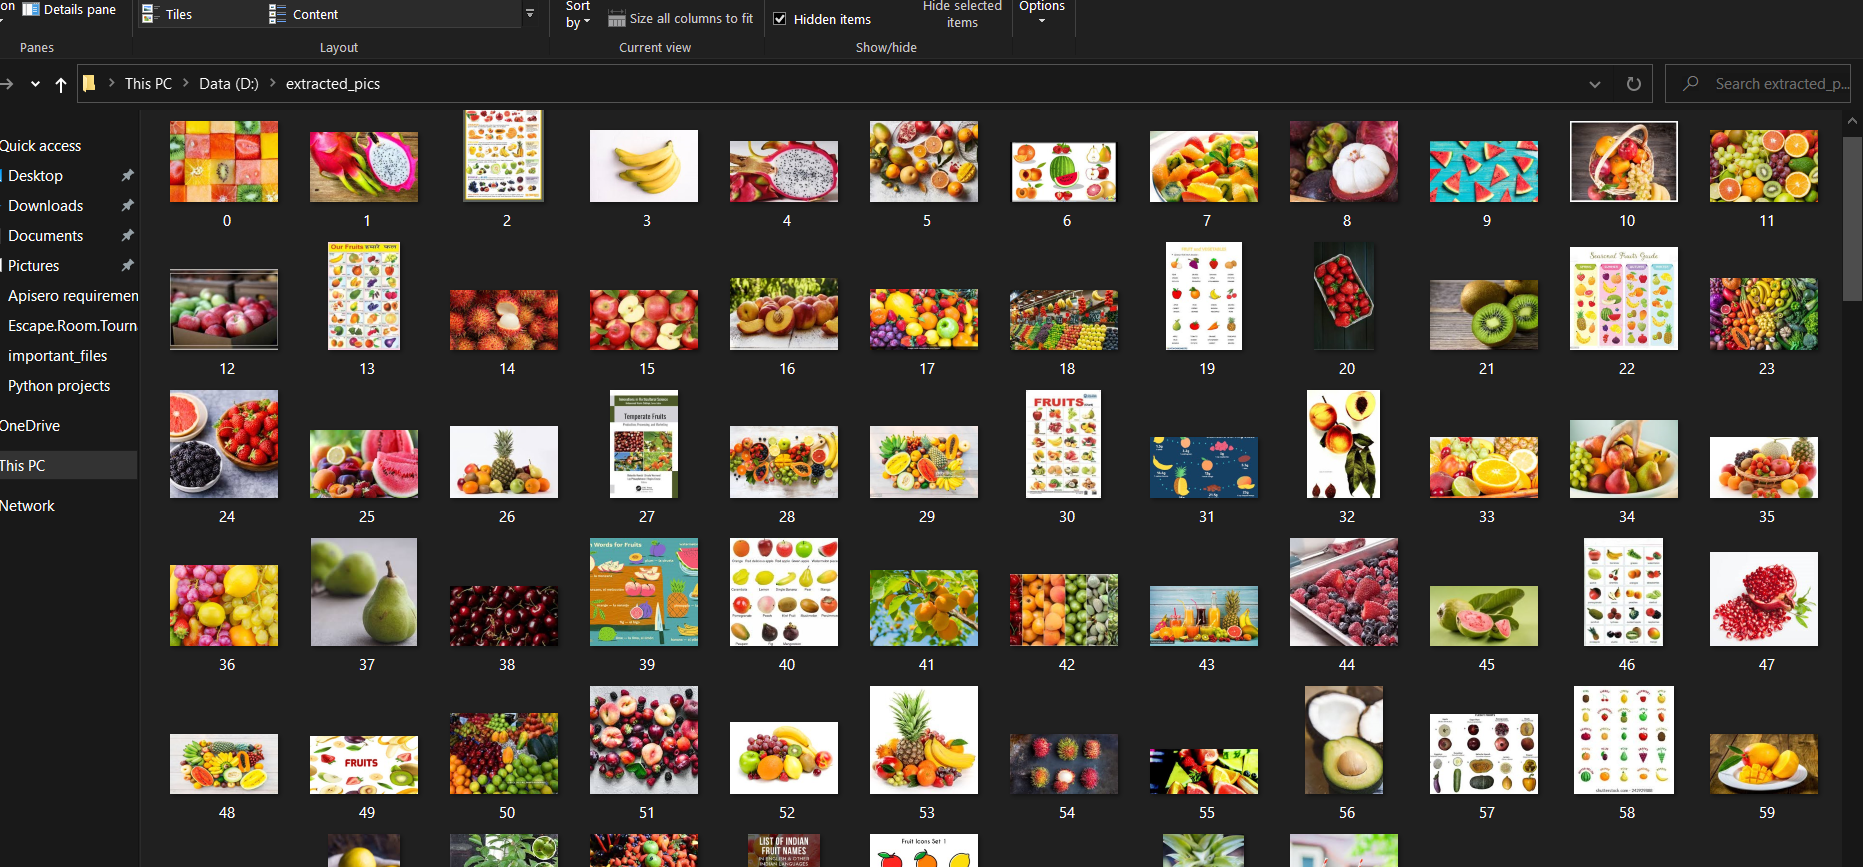

# Q. 4

In [17]:
warnings.filterwarnings("ignore")
from tqdm import tqdm

item = input(" Enter the name of Smartphone that has to be searched : ")
driver = webdriver.Chrome(ChromeDriverManager().install())

## required info

Brand = []
Phone_name= []
Colour = []
RAM = []
Storage_ROM = []
Primary_Camera = []
Secondary_Camera = []
Display_Size = []
Display_Resolution = []
Processor = []
Processor_Cores = []
Battery_Capacity = []
Price = []
URL = []




#get the web page with given url
url = "https://www.flipkart.com/"
driver.get(url)
time.sleep(3)





## close the sign up 
driver.find_element_by_xpath("//div[@class='_2QfC02']//button").click()

serch_bar = driver.find_element_by_xpath("//div[@class='_3OO5Xc']//input")
serch_bar.send_keys(item)

srch_btn = driver.find_element_by_xpath("/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button")
srch_btn.click()
time.sleep(5)


page1_urls = []
urls = driver.find_elements_by_xpath('//a[@class="_1fQZEK"]')
for url in urls:
    page1_urls.append(url.get_attribute("href"))
    
for url in tqdm(page1_urls):
    driver.get(url)                                                        
    URL.append(url)                                                          
    time.sleep(2)
    
    
    #Clicking on read more button
    try:
        read_more = driver.find_element_by_xpath('//button[@class="_2KpZ6l _1FH0tX"]')     
        read_more.click()
    except NoSuchElementException:
        print("Exception occured while moving to next page")
    
    
    #Scraping brand name of phone data
    try:
        brand_tags = driver.find_element_by_xpath('//span[@class="B_NuCI"]')      
        Brand.append(brand_tags.text.split()[0])
    except NoSuchElementException:
        Brand.append('-')
    
    
    #Scraping phone name data
    try:
        name_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/table/tbody/tr[3]/td[2]/ul/li')     
        Phone_name.append(name_tags.text)
    except NoSuchElementException:
        Phone_name.append('-')
    
    
    #Scraping phone color data
    try:
        color_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/table/tbody/tr[4]/td[2]/ul/li')      
        Colour.append(color_tags.text)
    except NoSuchElementException:
        Colour.append('-')
     
    
    #Scraping RAM data
    try:
        ram_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table[1]/tbody/tr[2]/td[2]/ul/li')                
        RAM.append(ram_tags.text)
    except NoSuchElementException:
        RAM.append('-')
    
    
    #Scraping ROM data
    try:
        rom_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table[1]/tbody/tr[1]/td[2]/ul/li')        
        Storage_ROM.append(rom_tags.text)
    except NoSuchElementException:
        Storage_ROM.append('-')
        
        
    #Scraping Primary camera data
    try:                                                                                    
        pri_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[2]/td[2]/ul/li')
        Primary_Camera.append(pri_tags.text)
    except NoSuchElementException:
        Primary_Camera.append('-')
        
        
    #Scraping secondary camera data
    try:                                                                                    
        sec_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[6]/td[1]')
        if sec_tags != "Secondary Camera" : 
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[5]/td[1]').text == "Secondary Camera":
                sec_cam = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[5]/td[2]/ul/li')
            else :
                raise NoSuchElementException
        else :
            sec_cam = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[6]/td[2]/ul/li')
        Secondary_Camera.append(sec_cam.text)
    except NoSuchElementException:
        Secondary_Camera.append('-')
        
        
    #Scraping Display size data 
    try:
        disp_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/div')
        if disp_tags.text != "Display Features" : raise NoSuchElementException
        disp_size = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/table[1]/tbody/tr[1]/td[2]/ul/li')  
        Display_Size.append(disp_size.text)
    except NoSuchElementException:
        Display_Size.append('-')
    
    
    #Scraping display resolution data
    try:
        dires_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/div')
        if dires_tags.text != "Display Features" : raise NoSuchElementException
        disp_reso = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/table[1]/tbody/tr[2]/td[2]/ul/li')    
        Display_Resolution.append(disp_reso.text)
    except NoSuchElementException:
        Display_Resolution.append('-')
    
    
    
    #Scraping Processor data
    try:
        pro_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[1]')
        if pro_tags.text != "Processor Type" : raise NoSuchElementException
        processor = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[2]/ul/li')   
        Processor.append(processor.text)
    except NoSuchElementException:
        Processor.append('-')
        
    
    
    #Scraping Processor core data    
    try:                                                                                     
        core_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[3]/td[1]')
        if core_tags.text != "Processor Core" :
            core_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[1]')
            if core_tags.text != "Processor Core" : 
                raise NoSuchElementException
            else :
                cores = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[2]/ul/li')
        else :
            cores = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[3]/td[2]/ul/li')
        Processor_Cores.append(cores.text)
    except NoSuchElementException:
        Processor_Cores.append('-')
    
    
    
    #Scraping battery capacity data
    try:
        if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/div').text != "Battery & Power Features" :
            if driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/div').text == "Battery & Power Features" :
                bat_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/table/tbody/tr/td[1]')
                if bat_tags.text != "Battery Capacity" : raise NoSuchElementException
                bat_capa = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][9]/table/tbody/tr/td[2]/ul/li')                
            elif driver.find_element_by_xpath('//div[@class="_3k-BhJ"][8]/div').text == "Battery & Power Features" :
                bat_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][8]/table/tbody/tr/td[1]')
                if bat_tags.text != "Battery Capacity" : raise NoSuchElementException
                bat_capa = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][8]/table/tbody/tr/td[2]/ul/li')
            else:
                raise NoSuchElementException
        else :
            bat_tags = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/table/tbody/tr/td[1]')
            if bat_tags.text != "Battery Capacity" : raise NoSuchElementException
            bat_capa = driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/table/tbody/tr/td[2]/ul/li')              
        Battery_Capacity.append(bat_capa.text)
    except NoSuchElementException:
        Battery_Capacity.append('-')
        
        
        
    #Scraping Price data
    try:
        price_tags = driver.find_element_by_xpath('//div[@class="_30jeq3 _16Jk6d"]')      
        Price.append(price_tags.text)
    except NoSuchElementException:
        Price.append('-')    

 Enter the name of Smartphone that has to be searched : pixel 4A


[WDM] - Current google-chrome version is 93.0.4577
[WDM] - Get LATEST driver version for 93.0.4577


[WDM] - Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache
100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [01:40<00:00,  4.19s/it]


In [19]:
df =pd.DataFrame(list(zip(Brand,Phone_name,Colour,RAM,Storage_ROM,Primary_Camera,Secondary_Camera ,Display_Size,Display_Resolution,Processor,Processor_Cores,Battery_Capacity,Price,URL)))
df.columns = ['Brand','Phone_name','Colour','RAM','Storage_ROM','Primary_Camera','Secondary_Camera' ,'Display_Size','Display_Resolution','Processor','Processor_Cores','Battery_Capacity','Price','URL']
df

,Brand,Phone_name,Colour,RAM,Storage_ROM,Primary_Camera,Secondary_Camera,Display_Size,Display_Resolution,Processor,Processor_Cores,Battery_Capacity,Price,URL
0,Google,Pixel 4a,Just Black,6 GB,128 GB,12.2MP Rear Camera,8MP Front Camera,14.76 cm (5.81 inch),2340 x 1080 Pixels,Qualcomm Snapdragon 730G,Octa Core,3140 mAh,"₹31,999",https://www.flipkart.com/google-pixel-4a-just-...
1,REDMI,9 Power,Blazing Blue,4 GB,64 GB,48MP + 8MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹11,499",https://www.flipkart.com/redmi-9-power-blazing...
2,REDMI,9 Power,Mighty Black,4 GB,64 GB,48MP + 8MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹11,499",https://www.flipkart.com/redmi-9-power-mighty-...
3,REDMI,9 Power,Blazing Blue,6 GB,128 GB,48MP + 8MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹13,499",https://www.flipkart.com/redmi-9-power-blazing...
4,REDMI,9 Power,Fiery Red,4 GB,64 GB,48MP + 8MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹11,499",https://www.flipkart.com/redmi-9-power-fiery-r...
5,REDMI,9 Power,Fiery Red,6 GB,128 GB,48MP + 8MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹13,499",https://www.flipkart.com/redmi-9-power-fiery-r...
6,REDMI,9 Power,Mighty Black,6 GB,128 GB,48MP + 8MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹13,499",https://www.flipkart.com/redmi-9-power-mighty-...
7,REDMI,9 Power,Electric Green,4 GB,64 GB,48MP + 8MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹11,499",https://www.flipkart.com/redmi-9-power-electri...
8,SAMSUNG,M31s,Mirage Blue,8 GB,128 GB,64MP + 12MP,32MP Front Camera,16.51 cm (6.5 inch),1080 x 2400$$pixel,Exynos 9611 octa core processor,Octa Core,6000 mAh,"₹21,900",https://www.flipkart.com/samsung-m31s-mirage-b...
9,REDMI,9 Power,Electric Green,6 GB,128 GB,48MP + 8MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080$$pixel,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹13,499",https://www.flipkart.com/redmi-9-power-electri...


# Q. 5

In [22]:
driver = webdriver.Chrome(ChromeDriverManager().install())
time.sleep(2)

# google map link
url = "https://www.google.co.in/maps"
driver.get(url)
time.sleep(2)

#Sending keyword for seach bar and search button
city = input('Enter City name that has to be searched : ')
search_bar = driver.find_element_by_id("searchboxinput")                       
search_bar.clear()                                                             
time.sleep(2)
search_bar.send_keys(city)                                                     
search_btn = driver.find_element_by_id("searchbox-searchbutton")              
search_btn.click()                                                             
time.sleep(3)

try:
    url_str = driver.current_url
    print("URL Extracted: ", url_str)
    latitude_longitude = re.findall(r'@(.*)data',url_str)
    if len(latitude_longitude):
        lat_lng_list = latitude_longitude[0].split(",")
        if len(lat_lng_list)>=2:
            latitude = lat_lng_list[0]
            longitude = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(latitude, longitude))

except Exception as e:
        print("Error: ", str(e))

[WDM] - Current google-chrome version is 93.0.4577
[WDM] - Get LATEST driver version for 93.0.4577
[WDM] - Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache


 
Enter City name that has to be searched : Bhopal
URL Extracted:  https://www.google.co.in/maps/place/Bhopal,+Madhya+Pradesh/@23.1993477,77.2658041,11z/data=!3m1!4b1!4m5!3m4!1s0x397c428f8fd68fbd:0x2155716d572d4f8!8m2!3d23.2599333!4d77.412615
Latitude = 23.1993477, Longitude = 77.2658041


# Q. 6

In [28]:

driver = webdriver.Chrome(ChromeDriverManager().install())



driver.get('https://trak.in/')

fund_button = driver.find_element_by_xpath('//li[@id="menu-item-51510"]/a').get_attribute('href')
driver.get(fund_button)

Date = []
Startup = []
Industry  = []
sub_vertical = []
Location = []
Investor = []
Investment_Type = []
Amount = []

sleep(2)

for i in range(48,51):
    driver.find_element_by_xpath(f'//div[@id="tablepress-{i}_wrapper"]/div/label/select/option[4]').click()

    # Scraping data of Date
    date_tags = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[2]'.format(i))
    for date in date_tags:
        Date.append(date.text)

    # Scraping data of Startup Name
    name_tags = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[3]'.format(i))
    for name in name_tags:
        Startup.append(name.text)
    
    # Scraping data of Industry OR Vertical
    ind_tags = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[4]'.format(i))
    for n in ind_tags:
        Industry.append(n.text)
    
    # Scraping data of Sub-Vertical
    sv_tags = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[5]'.format(i))
    for sv in sv_tags:
        sub_vertical.append(sv.text)

    # Scraping data of Location
    loc_tags = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[6]'.format(i))
    for loc in loc_tags:
        Location.append(loc.text)
    
    # Scraping data of Investor
    inv_tags = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[7]'.format(i))
    for inv in inv_tags:
        Investor.append(inv.text)
        
    # Scraping data of Investment Type
    invt_tags = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[8]'.format(i))
    for invt in invt_tags:
        Investment_Type.append(invt.text)
    
    # Scraping data of Amount
    amt_tags = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[9]'.format(i))
    for amt in amt_tags:
        Amount.append(amt.text)



[WDM] - Current google-chrome version is 93.0.4577
[WDM] - Get LATEST driver version for 93.0.4577
[WDM] - Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache


In [43]:
df =pd.DataFrame(list(zip(Date,Startup,Industry ,sub_vertical,Location ,Investor ,Investment_Type,Amount)))
df.columns = ['Date','Startup','Industry' ,'Sub-Vertical','Location' ,'Investor' ,'Investment Type','Amount']
df['Date']= pd.to_datetime(df['Date'])
df.sort_values('Date',ascending=False)

,Date,Startup,Industry,Sub-Vertical,Location,Investor,Investment Type,Amount
23,2020-12-09,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
15,2020-12-08,Classplus,EduTech,"E-learning, Online Tutoring",Noida,Falcon Edge,In Progress,"upto 15,000,000"
14,2020-11-08,Terra.do,EduTech,"Online Climate School, E-learning","Stanford, California,","Stanford Angels and Entrepreneurs (India), BEE...",Seed,"1,400,000"
17,2020-10-08,ZestMoney,FinTech,Financial Services,Bangalore,Primrose Hills Ventures,,"10,670,000"
6,2020-10-07,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
26,2020-09-09,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
24,2020-09-09,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
5,2020-09-07,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
30,2020-08-31,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
29,2020-08-31,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"


# Q. 7

In [74]:
driver = webdriver.Chrome(ChromeDriverManager().install())
time.sleep(2)

lap_name = []
ope_sys = []
display = []
processor = []
memory = []
weight = []
dimensions = []
graph_proc = []
price = []


#Opening the surl
url = "https://www.digit.in/"
driver.get(url)
time.sleep(3)

#searching for  best gaming laptop
best_gam_lap = driver.find_element_by_xpath("//div[@class='listing_container']//ul//li[9]").click()
time.sleep(4)


name_tags = driver.find_elements_by_xpath("//table[@id='summtable']//tr//td[1]")
for name in name_tags:
    lap_name.append(name.text)
    
    
#Scraping the data of operating system
try:
    os_tags = driver.find_elements_by_xpath("//div[@class='Spcs-details']//tr[3]//td[3]")
    for os in os_tags:
        ope_sys.append(os.text)
except NoSuchElementException:
    pass


#Scraping data of display
try:
    disp_tags = driver.find_elements_by_xpath("//div[@class='Spcs-details']//tr[4]//td[3]")
    for disp in disp_tags:
        display.append(disp.text)
except NoSuchElementException:
    pass


#Scraping data of Processor
try:
    pro_tags = driver.find_elements_by_xpath("//div[@class='Spcs-details']//tr[5]//td[3]")
    for pro in pro_tags:
        processor.append(pro.text)
except NoSuchElementException:
    pass


#Scraping data of memory
try:
    memo_tags = driver.find_elements_by_xpath("//div[@class='Spcs-details']//tr[6]//td[3]")
    for memo in memo_tags:
        memory.append(memo.text)
except NoSuchElementException:
    pass


#Scraping data of weight
try:
    wgt_tags = driver.find_elements_by_xpath("//div[@class='Spcs-details']//tr[7]//td[3]")
    for wgt in wgt_tags:
        weight.append(wgt.text)
except NoSuchElementException:
    pass


#Scraping data of dimensions
try:
    dim_tags = driver.find_elements_by_xpath("//div[@class='Spcs-details']//tr[8]//td[3]")
    for dim in dim_tags:
        dimensions.append(dim.text)
except NoSuchElementException:
    pass


#Scraping data of Graph processor
try:
    gra_tags = driver.find_elements_by_xpath("//div[@class='Spcs-details']//tr[9]//td[3]")
    for gra in gra_tags:
        graph_proc.append(gra.text)
except NoSuchElementException:
    pass


#Scraping data of price
try:
    pri_tags = driver.find_elements_by_xpath("//td[@class='smprice']")
    for pri in pri_tags:
        price.append(pri.text.replace('₹','Rs '))
except NoSuchElementException:
    pass


[WDM] - Current google-chrome version is 93.0.4577
[WDM] - Get LATEST driver version for 93.0.4577


[WDM] - Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache


In [78]:
df = pd.DataFrame(list(zip(lap_name,ope_sys, display,processor,memory,weight,dimensions,graph_proc,price)))
df.columns = ['Name','OS','Display','Processor','Memory','Weight','Dimensions','Graphics','Price']
df

,Name,OS,Display,Processor,Memory,Weight,Dimensions,Graphics,Price
0,Alienware Area 51M R2,Windows 10 Home,"17.3"" (1920 x 1080)",10th Generation Intel® Core™ i7-10700 | 2.90 GHz,1 TB SSD/16 GBGB DDR4,4.1,27.65 x 402.6 x 319.14,Intel® UHD Graphics 630,N/A
1,Alienware m15 R3,Windows 10 Home,"15.6"" (3840 x 2160)",10th Generation Intel® Core™ i9-10980HK | NA,1 TB SSD/16 GBGB DDR4,NA,NA,NA,"Rs 341,990"
2,ASUS ROG Strix Scar 15,Windows 10 Home,"15.6"" (1920 x 1080)",AMD Ryzen™ 9 5900HX | 3.3 GHz,1 TB SSD/16 GBGB DDR4,2.30,35.4 x 25.9 x 2.26,NVIDIA® GeForce RTX™ 3070,N/A
3,Asus ROG Zephyrus G14,Windows 10 Home,"14"" (1920 x 1080)",AMD 3rd Generation Ryzen 9 | 3.3 GHz,1 TB SSD/16 GBGB DDR4,1.65,32.5 x 22.1 x 1.8,NVIDIA GeForce RTX 2060,"Rs 164,990"
4,Lenovo Legion 5i,Windows 10 Pro,"15.6"" (1920 x 1080)",10th Generation Intel® Core™ i5-10300H | 2.50 GHz,1 TB SSD/16 GBGB DDR4,2.3,363.06 x 259.61 x 23.57,NVIDIA® GeForce® GTX 1650 4GB,"Rs 76,988"
5,ASUS ROG ZEPHYRUS DUO 15,Windows 10,"15.6"" (3840 x 1100)",Intel Core i7 10th Gen 10875H | NA,512 GB SSD/4 GBGB DDR4,2.4,268.30 x 360.00 x 20.90,NVIDIA GeForce RTX 2070 Max-Q,"Rs 185,000"
6,Acer Aspire 7 gaming,Windows 10 Home,"15.6"" (1920 x 1080)",AMD Ryzen™ 5-5500U hexa-core | NA,512 GB SSD/8 GBGB DDR4,2.15,2.29 x 36.3 x 25.4,NVIDIA® GeForce® GTX 1650,"Rs 64,370"


# Q. 8

In [84]:
driver = webdriver.Chrome(ChromeDriverManager().install())
time.sleep(2)




Rank = []
Person_Name = []
total_net_worth = []
Age = []
citizenship = []
Source = []
industry = []


#get the specified url
url = "https://www.forbes.com/?sh=69e6b8c92254"
driver.get(url)
time.sleep(3)

#clicking the explore button
button = driver.find_element_by_xpath("//button[@class='icon--hamburger']")
button.click()
time.sleep(2)

#select billionaire  
bill = driver.find_element_by_xpath("/html/body/div[1]/header/nav/div[3]/ul/li[1]")
bill.click()
#select world billionaire  
world_bill= driver.find_element_by_xpath("/html/body/div[1]/header/nav/div[3]/ul/li[1]/div[2]/ul/li[2]/a")
world_bill.click()
time.sleep(1)




while(True):
    #Scraping the data of rank
    rank_tags= driver.find_elements_by_xpath("//div[@class='rank']")
    for rank in rank_tags:
        Rank.append(rank.text)
    time.sleep(1)
    
    
    #Scraping the data of names
    name_tags= driver.find_elements_by_xpath("//div[@class='personName']//div")
    for name in name_tags:
        Person_Name.append(name.text)
    time.sleep(1)
    
    
    #Scraping data of age
    age_tags= driver.find_elements_by_xpath("//div[@class='age']//div")
    for age in age_tags:
        Age.append(age.text)   
    time.sleep(1)
    
    
    #Scraping data of citizenship
    cit_tags= driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
    for cit in cit_tags:
        citizenship.append(cit.text)
    time.sleep(1)
    
    
    #Scraping data of source of income
    sour_tags= driver.find_elements_by_xpath("//div[@class='source']")
    for sour in sour_tags:
        Source.append(sour.text)    
    time.sleep(1)
    
    
    #Scraping data of Industry
    ind_tags= driver.find_elements_by_xpath("//div[@class='category']//div")
    for ind in ind_tags:
        industry.append(ind.text)
        
        
    #scraping data of net_worth of billionaire 
    net_tags= driver.find_elements_by_xpath("//div[@class='netWorth']//div[1]")
    for net in net_tags:
        total_net_worth.append(net.text)
    time.sleep(1)
    
    
    #Clicking on next button
    try:
        next_button = driver.find_element_by_xpath("//button[@class='pagination-btn pagination-btn--next ']")
        next_button.click()
    except:
        break
        
#Scraping data of net worth
Net_Worth = []
for i in range(0,len(total_net_worth),2):
    Net_Worth.append(total_net_worth[i])
    
    


[WDM] - Current google-chrome version is 93.0.4577
[WDM] - Get LATEST driver version for 93.0.4577


[WDM] - Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache


In [86]:
df = pd.DataFrame(list(zip(Rank,Person_Name,total_net_worth,Age,citizenship,Source,industry)),columns=['Rank','Name','Net_worth','Age','Citenzenship','Source','Industry'])
df

,Rank,Name,Net_worth,Age,Citenzenship,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$151 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$150 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
2750,2674.,Daniel Yong Zhang,$2.3 B,49,China,e-commerce,Technology
2751,2674.,Zhang Yuqiang,,65,China,Fiberglass,Manufacturing
2752,2674.,Zhao Meiguang,$2.3 B,58,China,gold mining,Metals & Mining
2753,2674.,Zhong Naixiong,,58,China,conglomerate,Diversified


# Q. 9

In [66]:

# Activating the chrome browser
driver = webdriver.Chrome(ChromeDriverManager().install())
time.sleep(2)

input_val = str(input())

driver.get(f'https://www.youtube.com/results?search_query={input_val}')
time.sleep(2)

link_click = driver.find_element_by_xpath("//yt-formatted-string[@class ='style-scope ytd-video-renderer']")
link_click.click()

comments = []
comment_time = []
Time = []
Likes = []
No_of_Likes = []


for _ in range(300):
    driver.execute_script("window.scrollBy(0,10000)")
    
cm_tags = driver.find_elements_by_id("content-text")
for cm in cm_tags:
    if cm.text is None:
        comments.append("--")
    else:
        comments.append(cm.text)
time.sleep(5)

tm_tags = driver.find_elements_by_xpath("//a[contains(text(),'ago')]")
for tm in tm_tags:
    Time.append(tm.text)

for i in range(0,len(Time),2):
    comment_time.append(Time[i])
time.sleep(5)


like_tags = driver.find_elements_by_xpath("//span[@class='style-scope ytd-comment-action-buttons-renderer']")
for like in like_tags:
    Likes.append(like.text)
    
for i in range(1,len(Likes),2):
    No_of_Likes.append(Likes[i])


    
    


[WDM] - Current google-chrome version is 93.0.4577
[WDM] - Get LATEST driver version for 93.0.4577
[WDM] - Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache


 
Justin Beiber


In [73]:
df=pd.DataFrame(list(zip(comments,comment_time,No_of_Likes)),columns=['Comments','comment_time','Likes'])
df

,Comments,comment_time,Likes
0,Im so happy that laroi is stepping up in the w...,2 months ago,43K
1,the kid is really steppin up in the music scen...,17 hours ago,560
2,Очень крутой трек 😀,1 day ago,616
3,Justin's sweet voice and Laroi's voice togethe...,1 day ago,249
4,"Every once in a while, there comes a song that...",22 hours ago,259
...,...,...,...
834,Fun fact : Charlie PUTH was a part of writing ...,2 months ago,354
835,Awesome 👍,17 hours ago,1
836,I need you to stay,12 hours ago,2
837,♥️,14 hours ago,1


# Q. 10 

In [88]:
driver = webdriver.Chrome(ChromeDriverManager().install())
time.sleep(3)



hostel_name = []
distance = []
pvt_prices = []
dorms_price = []
rating = []
reviews = []
over_all = []
facilities = []
description =[]
product_url = []


#get the web page with given url
url = "https://www.hostelworld.com/s?q=London,%20England&city=London&country=England&type=city&id=3&from=2021-09-29&to=2021-10-05&guests=2&page=1"
driver.get(url)
time.sleep(5)




# do click on search button
search_btn = driver.find_element_by_id('search-button')
search_btn.click()


for i in driver.find_elements_by_xpath("//div[@class = 'pagination-item pagination-current' or @class='pagination-item']"):
    i.click()
    time.sleep(4)
    #fetching hostel name
    try:
        name = driver.find_elements_by_xpath("//h2[@class='title title-6']")
        for i in name:
            hostel_name.append(i.text)
    except NoSuchElementException:
        hostel_name.append('-')
    #fetching distance from city centre
    
    try:
        dist = driver.find_elements_by_xpath("//div[@class='subtitle body-3']//a//span[1]")
        for i in dist:
            distance.append(i.text.replace('Hostel - ',''))
    except NoSuchElementException:
        distance.append('-')
        
    for i in driver.find_elements_by_xpath("//div[@class='prices-col']"):
    #fetch privates from price
        try:
            pvt_price = driver.find_element_by_xpath("//a[@class='prices']//div[1]//div")
            pvt_prices.append(pvt_price.text)
        except NoSuchElementException:
            pvt_prices.append('-')
    #fetching dorms from price
    for i in driver.find_elements_by_xpath("//div[@class='prices-col']"):
        try:
            dorms = driver.find_element_by_xpath("//a[@class='prices']//div[2]//div")
            dorms_price.append(dorms.text)
        except NoSuchElementException:
            dorms_price.append('-')
            #fetching facilities
    try:
        fac1 = driver.find_elements_by_xpath("//div[@class='has-wifi']")
        fac2 = driver.find_elements_by_xpath("//div[@class='has-sanitation']")
        for i in fac1:
            for j in fac2:
                facilities.append(i.text +', '+ j.text )
    except NoSuchElementException:
        facilities.append('-')
    #lets fetch url of each hostel
    p_url = driver.find_elements_by_xpath("//div[@class='prices-col']//a[2]")
    for i in p_url:
        product_url.append(i.get_attribute('href'))

for i in product_url:
    driver.get(i)
    time.sleep(3)
    #lets click on show more button for description
    try:
        driver.find_element_by_xpath("//a[@class='toggle-content']").click()
        time.sleep(5)
    except NoSuchElementException:
        pass
    #fetching ratings
    try:
        rat = driver.find_element_by_xpath("//div[@class='score orange big' or @class='score gray big']")
        rating.append(rat.text)
    except NoSuchElementException:
        rating.append('-')
    #fetching total reviews
        
    try:
        rws = driver.find_element_by_xpath("//div[@class='reviews']")
        reviews.append(rws.text.replace('Total Reviews',''))
    except NoSuchElementException:
        reviews.append('-')
        #fetch overall review
    try:
        overall_rw = driver.find_element_by_xpath("//div[@class='keyword']//span")
        over_all.append(overall_rw.text)
    except NoSuchElementException:
        over_all.append('-')
    #fetch property description 
    try:
        disc = driver.find_element_by_xpath("//div[@class='content']")
        description.append(disc.text)
    except NoSuchElementException:
        over_all.append('-')
        
        


[WDM] - Current google-chrome version is 93.0.4577
[WDM] - Get LATEST driver version for 93.0.4577


[WDM] - Driver [C:\Users\91917\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache


In [90]:
df =pd.DataFrame(list(zip(hostel_name,distance ,pvt_prices,dorms_price,rating,reviews,over_all,facilities,description,product_url)))
df.columns = ['Hostel_name','Location','PVT_Price','Dorms_Price','Rating','Reviews','other_details','facilities','description','url']
df

,Hostel_name,Location,PVT_Price,Dorms_Price,Rating,Reviews,other_details,facilities,description,url
0,PubLove @ The Rose & Crown,1.6km from city centre,€91,€20,7.9,101,Very Good,"Free WiFi, Follows Covid-19 sanitation guidance","65 Union Street, London, England",https://www.hostelworld.com/pwa/hosteldetails....
1,"PubLove @ The Green Man, Paddington",4.3km from city centre,€91,€20,6.2,394,Good,"Free WiFi, Follows Covid-19 sanitation guidance","308 Edgware Road, London, England",https://www.hostelworld.com/pwa/hosteldetails....
2,St Christopher's Village,1.8km from city centre,€91,€20,8.6,10855,Fabulous,"Free WiFi, Follows Covid-19 sanitation guidance","165 Borough High Street, London, England",https://www.hostelworld.com/pwa/hosteldetails....
3,Saint James Backpackers,5.5km from city centre,€91,€20,7.4,1763,Very Good,"Free WiFi, Follows Covid-19 sanitation guidance","21 Longridge Road, London, England",https://www.hostelworld.com/pwa/hosteldetails....
4,Smart Russell Square Hostel,2.6km from city centre,€91,€20,7.0,9511,Very Good,"Free WiFi, Follows Covid-19 sanitation guidance","71 Guilford Street, London, England",https://www.hostelworld.com/pwa/hosteldetails....
...,...,...,...,...,...,...,...,...,...,...
61,Best Western Boltons London Kensington,Hotel - 5.4km from city centre,€165,-,2.0,2,Rating,"Free WiFi, Follows Covid-19 sanitation guidance","19-21 Penywern Road, London, England",https://www.hostelworld.com/pwa/hosteldetails....
62,Park Hotel Essex,Hotel - 24.1km from city centre,€165,-,-,0,No Rating,"Free WiFi, Follows Covid-19 sanitation guidance","327 Cranbrook Road, Ilford, London, England",https://www.hostelworld.com/pwa/hosteldetails....
63,Cranbrook Hotel,Hotel - 14.8km from city centre,€165,-,-,0,No Rating,"Free WiFi, Follows Covid-19 sanitation guidance","22/24 Coventry Road, Ilford, London, England",https://www.hostelworld.com/pwa/hosteldetails....
64,St. Athans,Bed and Breakfast - 2.9km from city centre,€165,-,7.6,236,Very Good,"Free WiFi, Follows Covid-19 sanitation guidance","20 Tavistock Place, Russell Square, London, En...",https://www.hostelworld.com/pwa/hosteldetails....
